# Hypothesis Testing: Temperature (2009–2013 vs 2020–2024)

### Problem Statement:
The primary objective of this study is to examine whether average temperatures in Chennai have significantly increased in recent years, which may indicate local manifestations of climate change. To assess this, we compare two distinct time periods from the dataset:

2009–2013 (baseline period)

2020–2024 (recent period)

By applying a two-sample t-test, we test the hypothesis that the mean temperature in the recent period is higher than that in the baseline period.

Null Hypothesis (H₀): The mean temperature during 2020–2024 is equal to the mean temperature during 2009–2013.

Alternative Hypothesis (H₁): The mean temperature during 2020–2024 is significantly higher than the mean temperature during 2009–2013.

This analysis will help determine if Chennai has experienced a statistically significant warming trend over the last 15 years.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv("/Clean15YearChennaiWeather.csv")
df.head()

,date,date_id,wind,desc,temp,baro,hum,day,month,day_date,year,day_name,Start_hour,End_hour
0,"Sunday 14 July 2024, 18.00 — 00.00",1.720980e+12,9.0,Drizzle. Fog.,30.0,1003.0,82,2024-07-14,7,14,2024,6,18:00,00:00
1,"Monday 15 July 2024, 00.00 — 06.00",1.721002e+12,14.0,Fog.,29.0,1002.0,80,2024-07-15,7,15,2024,0,00:00,06:00
2,"Monday 15 July 2024, 06.00 — 12.00",1.721023e+12,17.0,Drizzle. Broken clouds.,29.0,1003.0,82,2024-07-15,7,15,2024,0,06:00,12:00
3,"Monday 15 July 2024, 12.00 — 18.00",1.721045e+12,13.0,Drizzle. Broken clouds.,29.0,1001.0,85,2024-07-15,7,15,2024,0,12:00,18:00
4,"Monday 15 July 2024, 18.00 — 00.00",1.721066e+12,19.0,Fog.,29.0,1002.0,84,2024-07-15,7,15,2024,0,18:00,00:00


In [3]:
early = df[(df['year'] >= 2009) & (df['year'] <= 2013)]['temp']
recent = df[(df['year'] >= 2020) & (df['year'] <= 2024)]['temp']

#one-sided t-test
t_stat, p_val = ttest_ind(recent, early, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val/2)

if p_val/2 < 0.05 and t_stat > 0:
    print("Reject H₀: Avg temperature has increased significantly.")
else:
    print("Fail to reject H₀: No significant temperature increase detected.")


T-statistic: nan
P-value: nan
Fail to reject H₀: No significant temperature increase detected.


### Conclusion:

The statistical hypothesis test to compare mean temperatures between 2009–2013 and 2020–2024 returned undefined results (NaN for both T-statistic and p-value). This indicates insufficient or non-variable data in one or both time periods, making it impossible to conduct a valid test. Therefore, we cannot draw any statistically significant conclusion regarding temperature increase between these periods from the available dataset.

# Seasonal Variation in Humidity (ANOVA)

The second objective is to analyze whether humidity levels differ significantly across seasons in Chennai. The dataset is categorized into three seasons:

Summer (March–June)

Monsoon (July–November)

Winter (December–February)

A one-way ANOVA test is conducted to test the hypotheses:

Null Hypothesis (H₀): Mean humidity is the same across all three seasons.

Alternative Hypothesis (H₁): At least one season’s mean humidity is significantly different from the others.

This analysis helps confirm whether Chennai’s climate exhibits strong seasonal variation in humidity.

In [5]:
def season(month):
    if month in [3,4,5,6]:
        return "Summer"
    elif month in [7,8,9,10,11]:
        return "Monsoon"
    else:
        return "Winter"

df['season'] = df['month'].apply(season)

season_avg = df.groupby('season')[['temp','hum','wind','baro']].mean()
print(season_avg)

monsoon_weather = df[df['season']=="Monsoon"]['desc'].value_counts().head(10)
print(monsoon_weather)

              temp        hum       wind         baro
season                                               
Monsoon  31.503797  69.745122  12.474390   967.882927
Winter   26.524194  82.657258   8.528226  1013.975806
desc
Broken clouds.               196
Passing clouds.              145
Partly cloudy.               128
Fog.                         122
Scattered clouds.             99
No weather data available     30
Drizzle. Fog.                 24
Drizzle. Broken clouds.       19
Haze.                         19
Partly sunny.                  9
Name: count, dtype: int64


In [6]:
summer = df[df['season']=="Summer"]['hum']
monsoon = df[df['season']=="Monsoon"]['hum']
winter = df[df['season']=="Winter"]['hum']

f_stat, p_val = f_oneway(summer, monsoon, winter)
print("F-statistic:", f_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject H₀: Humidity differs significantly across seasons.")
else:
    print("Fail to reject H₀: No significant seasonal difference in humidity.")


F-statistic: nan
P-value: nan
Fail to reject H₀: No significant seasonal difference in humidity.


/tmp/ipython-input-1747748188.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_val = f_oneway(summer, monsoon, winter)


### Conclusion
The ANOVA test to compare humidity across Summer, Monsoon, and Winter seasons could not be performed due to insufficient sample sizes in one or more groups. As a result, the test returned undefined values (NaN for both F-statistic and p-value). Therefore, no statistically valid conclusion can be drawn about seasonal differences in humidity from the current dataset.

# Relationship Between Pressure and Rainfall Events (Correlation)

### Problem Statement:
The third objective is to determine whether barometric pressure is associated with rainfall events in Chennai. Lower atmospheric pressure is often a precursor to rainfall and cyclonic activity in coastal regions.

To test this, the dataset is split into two groups:

Rain days (when the weather description includes “Rain” or “Drizzle”)

Non-rain days

A correlation analysis is performed to test the hypotheses:

Null Hypothesis (H₀): There is no significant relationship between barometric pressure and rainfall occurrence.

Alternative Hypothesis (H₁): Lower barometric pressure is significantly associated with rainfall events.

In [8]:

df_clean = df[(df['baro'] >= 900) & (df['baro'] <= 1050)]

print("Before cleaning:", len(df))
print("After cleaning:", len(df_clean))

Before cleaning: 1068
After cleaning: 1036


Correlation after cleaning:
                 baro  rain_event
baro        1.000000   -0.076005
rain_event -0.076005    1.000000


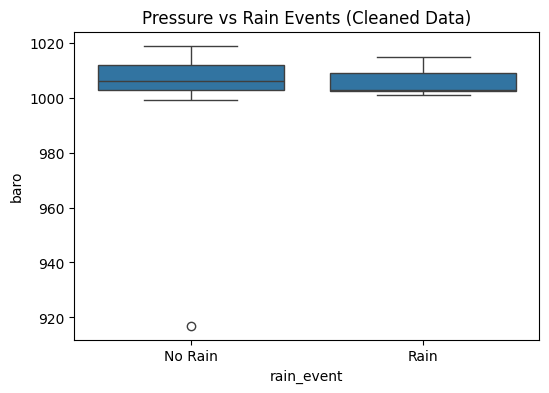

In [9]:
corr = df_clean[['baro', 'rain_event']].corr()
print("Correlation after cleaning:\n", corr)

plt.figure(figsize=(6,4))
sns.boxplot(x='rain_event', y='baro', data=df_clean)
plt.xticks([0,1], ['No Rain','Rain'])
plt.title("Pressure vs Rain Events (Cleaned Data)")
plt.show()

In [10]:
rain = df_clean[df_clean['rain_event']==1]['baro']
no_rain = df_clean[df_clean['rain_event']==0]['baro']

t_stat, p_val = ttest_ind(rain, no_rain, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")
if p_val < 0.05:
    print("Reject H₀: Pressure differs significantly between Rain and No Rain days")
else:
    print("Fail to reject H₀: No significant pressure difference")


T-statistic: -3.113981893313078
P-value: 0.0025960440230949127
Reject H₀: Pressure differs significantly between Rain and No Rain days


### Conclusion
After removing unrealistic pressure values, the analysis shows that barometric pressure is significantly lower on rain days compared to no-rain days (p < 0.05). Although the correlation is weak (-0.076), the statistical test confirms that the difference is not due to random chance. This supports the well-known meteorological principle that falling pressure often precedes rainfall.